In [1]:
import os
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
w = []

for file in os.listdir('Workouts'):
    if file.endswith('.json'):
        #print(file)
        with open(f'Workouts/{file}') as json_file:
            data = json.load(json_file)
            name, sport, start_time, duration_s, distance_km = '', 0, '', 0, 0
            for item in data:
                if 'name' in item:
                    name = item['name']
                elif 'sport' in item:
                    sport = item['sport']
                elif 'start_time' in item:
                    start_time = datetime.datetime.strptime(item['start_time'], '%Y-%m-%d %H:%M:%S.0')
                elif 'duration_s' in item:
                    duration_s = item['duration_s']
                elif 'distance_km' in item:
                    distance_km = item['distance_km']
            w.append({'name':name,
                      'sport':sport,
                      'start_time':start_time,
                      'duration_s':duration_s,
                      'distance_km':distance_km})


In [3]:
df = pd.DataFrame(w)

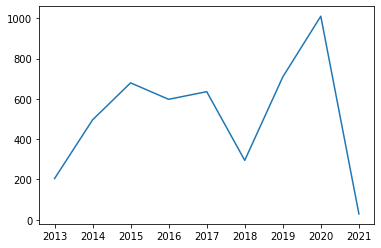

In [5]:
df.set_index(df['start_time'],inplace=True)
d = df[df["sport"]=='RUNNING']["distance_km"].resample('Y').sum()
plt.plot(d.index, d)